In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
ds = pd.read_csv('diabetes.csv')

In [ ]:
df = pd.DataFrame(ds)

In [ ]:
df.columns=['Partos','Glucosa','Presion','Piel','Insulina','IMC','Pedi','Edad','Clase']

In [ ]:
df

In [ ]:
df.describe()

In [ ]:
from pandas import set_option

In [ ]:
set_option('display.width', 100)
set_option('precision', 2)

In [ ]:
df.describe()

In [ ]:
Clases = df.groupby('Clase').size()

In [ ]:
Clases

In [ ]:
Pearson = df.corr(method='pearson')

In [ ]:
Pearson

In [ ]:
import seaborn as sns

In [ ]:
sns.heatmap (Pearson,annot = True)

In [ ]:
df_aux = df.copy(deep = True)
df_aux[['Glucosa','Presion','Piel','Insulina','IMC']] = 
df_aux[['Glucosa','Presion','Piel','Insulina','IMC']].replace(0,np.NaN)

In [ ]:
df_aux

In [ ]:
Resumen_NaN = df_aux.isnull().sum()

In [ ]:
Distribuciones = df_aux.hist(figsize = (10,7))

In [ ]:
df_aux['Glucosa'].fillna(df_aux['Glucosa'].mean(), inplace = True)
df_aux['Presion'].fillna(df_aux['Presion'].mean(), inplace = True)
df_aux['Piel'].fillna(df_aux['Piel'].median(), inplace = True)
df_aux['Insulina'].fillna(df_aux['Insulina'].median(), inplace = True)
df_aux['IMC'].fillna(df_aux['IMC'].median(), inplace = True)

In [ ]:
Distribuciones_ajustadas = df_aux.hist(figsize = (10,7))

In [ ]:
df_aux

In [ ]:
# Grafiquemos la función de densidad para este DataSet
# DataFrame -> Array Numpy, dejamos fuera columna de Clase
aDF = df_aux.values[:,:-1]

In [ ]:
aDF

In [ ]:
aDF = pd.DataFrame(aDF)
aDF.plot(kind='density')

In [ ]:
# La funcion de densidad no se aprecia correctamente pues
# el DataFrame no está normalizado.
# Normalizemos los datos y veamos que sucede.

from sklearn import preprocessing

aDF = df_aux.values[:,:-1]
normal = preprocessing.MinMaxScaler()
aScaler = normal.fit_transform(aDF)


In [ ]:
# Ahora el data frame está normalizado entre (0,1)
aScaler

In [ ]:
aDF = pd.DataFrame(aScaler)
aDF.plot(kind='density',subplots=True, layout=(3,4), sharex=False)

In [ ]:
# Verificar si existen Outliers en dataset original. Dejo fuera la Columna Clase (0/1)
for nDataSet in range(0,8):
 aDF = df_aux.values[nDataSet::,:-1]
 aDF = pd.DataFrame(aDF)
 aDF.plot(kind= 'box',figsize=(20,10))

In [ ]:
import seaborn
seaborn.set()
plt.scatter(df_aux['Glucosa'],df_aux['Insulina'])
plt.xlabel('Glucosa')
plt.ylabel('Insulina')

In [ ]:
import seaborn
seaborn.set()
plt.scatter(df_aux['Glucosa'],df_aux['Presion'])
plt.xlabel('Glucosa')
plt.ylabel('Presion')

In [ ]:
# Como probar si una distribución de datos es normal
from numpy.random import seed, randn
from statsmodels.graphics.gofplots import qqplot
# Configuro la semilla aleatoria
seed(1993)
# Genero 100 muestras
data = randn(100)
# Represento el Q-Q plot
qqplot(data,line='s')
plt.show()


In [ ]:
#aData = df_aux.values[0::,:-1]
aData = df_aux.values[0::,0] # DataSet Original sin normalización - Descriptor 0 -> Parto
aData

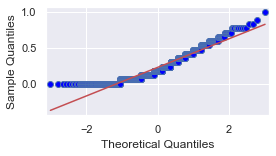

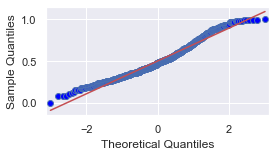

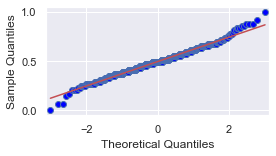

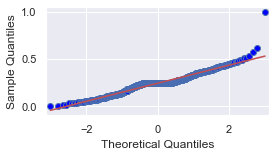

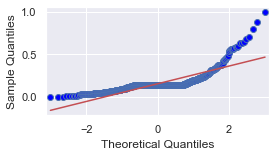

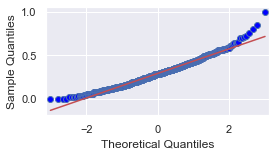

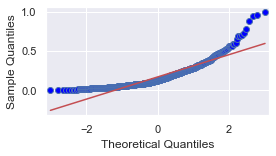

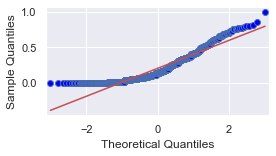

In [239]:
# Como probar si una distribución de datos es normal
from numpy.random import seed, randn
from statsmodels.graphics.gofplots import qqplot
# Configuro la semilla aleatoria
seed(1993)
for nDe in range(8): # son 8 los descriptores que hay que analizar
    aDF = pd.DataFrame(aScaler) # DataSet Normalizado
    aData = aDF.values[0::,nDe]
    with plt.rc_context():
         plt.rc("figure", figsize=(4,2))
         qqplot(aData,line='s')
plt.show()

In [210]:
# Prueba de Shapiro-Wilk
from numpy.random import seed, randn
from scipy.stats import shapiro

seed(1993)
for nDe in range(8): # son 8 los descriptores que hay que analizar
    aDF = pd.DataFrame(aScaler) 
    aData = aDF.values[0::,nDe]
    # Prueba de Shapiro-Wilk
    stat, p = shapiro(aData)
    print('Estadisticos = %.3f, p = %.3f' % (stat,p))
    # Interpretación
    alpha = 0.05
    if p > alpha:
       print('La muestra parece Gaussiana (no se rechaza la hipótesis nula H0')
    else:
       print('La muestra no parece Gaussiana(se rechaza la hipótesis nula H0')

Estadisticos = 0.904, p = 0.000
La muestra no parece Gaussiana(se rechaza la hipótesis nula H0
Estadisticos = 0.970, p = 0.000
La muestra no parece Gaussiana(se rechaza la hipótesis nula H0
Estadisticos = 0.988, p = 0.000
La muestra no parece Gaussiana(se rechaza la hipótesis nula H0
Estadisticos = 0.928, p = 0.000
La muestra no parece Gaussiana(se rechaza la hipótesis nula H0
Estadisticos = 0.642, p = 0.000
La muestra no parece Gaussiana(se rechaza la hipótesis nula H0
Estadisticos = 0.979, p = 0.000
La muestra no parece Gaussiana(se rechaza la hipótesis nula H0
Estadisticos = 0.837, p = 0.000
La muestra no parece Gaussiana(se rechaza la hipótesis nula H0
Estadisticos = 0.875, p = 0.000
La muestra no parece Gaussiana(se rechaza la hipótesis nula H0


In [212]:
# Prueba de D' Agostino K-Squared
from numpy.random import seed, randn
from scipy.stats import normaltest

for nDe in range(8): # son 8 los descriptores que hay que analizar
    aData = df_aux.values[0::,nDe]
    # Prueba de D' Agostino K-Squared 
    stat, p = normaltest(aData) 
    print('Estadisticos = %.3f, p = %.3f' % (stat,p))
    # Interpretación
    alpha = 0.05
    if p > alpha:
       print('La muestra parece Gaussiana (no se rechaza la hipótesis nula H0')
    else:
       print('La muestra no parece Gaussiana (se rechaza la hipótesis nula H0')

Estadisticos = 80.164, p = 0.000
La muestra no parece Gaussiana (se rechaza la hipótesis nula H0
Estadisticos = 35.326, p = 0.000
La muestra no parece Gaussiana (se rechaza la hipótesis nula H0
Estadisticos = 20.841, p = 0.000
La muestra no parece Gaussiana (se rechaza la hipótesis nula H0
Estadisticos = 168.007, p = 0.000
La muestra no parece Gaussiana (se rechaza la hipótesis nula H0
Estadisticos = 585.621, p = 0.000
La muestra no parece Gaussiana (se rechaza la hipótesis nula H0
Estadisticos = 54.704, p = 0.000
La muestra no parece Gaussiana (se rechaza la hipótesis nula H0
Estadisticos = 321.839, p = 0.000
La muestra no parece Gaussiana (se rechaza la hipótesis nula H0
Estadisticos = 119.878, p = 0.000
La muestra no parece Gaussiana (se rechaza la hipótesis nula H0


In [215]:
aDF_Aux

NameError: name 'aDF_Aux' is not defined

In [216]:
df_aux

,Partos,Glucosa,Presion,Piel,Insulina,IMC,Pedi,Edad,Clase
0,6,148.0,72.0,35.0,125.0,33.6,0.63,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.35,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.67,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.17,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.17,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.34,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.24,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.35,47,1


In [217]:
df_aux

,Partos,Glucosa,Presion,Piel,Insulina,IMC,Pedi,Edad,Clase
0,6,148.0,72.0,35.0,125.0,33.6,0.63,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.35,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.67,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.17,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.17,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.34,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.24,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.35,47,1


In [231]:
iris = pd.read_csv('iris.csv')

In [232]:
iris = pd.DataFrame(iris)

In [235]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [238]:
iris.drop('Id',axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


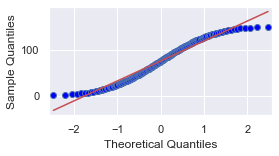

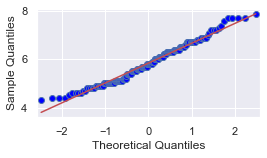

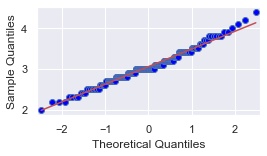

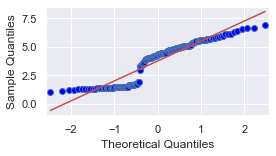

In [240]:
# Como probar si una distribución de datos es normal
from numpy.random import seed, randn
from statsmodels.graphics.gofplots import qqplot
for nDe in range(4): # son 4 los descriptores que hay que analizar
    aData = iris.values[0::,nDe]
    with plt.rc_context():
         plt.rc("figure", figsize=(4,2))
         qqplot(aData,line='s')
plt.show()

In [247]:
setosa = iris[iris.Species == 0]     # DataFrame planta iris->sotosa
versicolor = iris[iris.Species == 1] # DataFrame planta iris->versicolor

In [256]:
setosa.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


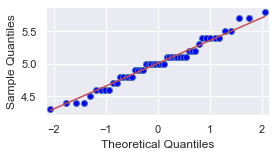

In [246]:
# Como probar si una distribución de datos es normal
from numpy.random import seed, randn
from statsmodels.graphics.gofplots import qqplot
aData = setosa.values[0::,1]
with plt.rc_context():
     plt.rc("figure", figsize=(4,2))
     qqplot(aData,line='s')
plt.show()

In [257]:
iris = iris.drop('Id',axis=1)

In [258]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [259]:
setosa = iris[iris.Species == 0]     # DataFrame planta iris->sotosa
versicolor = iris[iris.Species == 1] # DataFrame planta iris->versicolor

In [265]:
versicolor.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [267]:
iris.groupby('Species')['SepalWidthCm'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
0,50.0,3.42,0.38,2.3,3.12,3.4,3.68,4.4
1,50.0,2.77,0.31,2.0,2.52,2.8,3.00,3.4
2,50.0,2.97,0.32,2.2,2.80,3.0,3.18,3.8


In [269]:
versicolor

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [270]:
from scipy import stats

In [271]:
stats.levene(setosa['SepalWidthCm'],versicolor['SepalWidthCm'])

LeveneResult(statistic=0.6635459332943233, pvalue=0.41728596812962016)

In [274]:
stats.shapiro(versicolor['SepalWidthCm'])

ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)

In [282]:
df_aux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Partos    768 non-null    int64  
 1   Glucosa   768 non-null    float64
 2   Presion   768 non-null    float64
 3   Piel      768 non-null    float64
 4   Insulina  768 non-null    float64
 5   IMC       768 non-null    float64
 6   Pedi      768 non-null    float64
 7   Edad      768 non-null    int64  
 8   Clase     768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [283]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [286]:
X = iris.values[:,:-1] # Separamos los descriptores

In [288]:
y = iris.values[:,4] # Separamos las Clases

In [290]:
len(y) # Verificamos tamaño dataset

150

In [292]:
from sklearn.neighbors import KNeighborsClassifier

In [293]:
from sklearn import metrics

In [296]:
# Vamos a probar que KNN clasifica 100% bien con todos el set de prueba
# despues haremos una prediccion con KNN (k=5)
iris_knn = KNeighborsClassifier(n_neighbors=1).fit(X,y)

In [297]:
y_pred = iris_knn.predict(X)

In [298]:
print(np.all(y_pred==y))

True


In [299]:
iris_knn.score(X,y)

1.0

In [301]:
# Ahora probamos cin KNN (k=5) vecinos
iris_knn = KNeighborsClassifier(n_neighbors = 5).fit(X,y)

In [302]:
iris_knn

KNeighborsClassifier()

In [303]:
iris_knn.score(X,y)

0.9666666666666667

In [304]:
y_pred=iris_knn.predict(X) 

In [305]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [320]:
# Ahora probamos cin KNN (k=3) vecinos
iris_knn = KNeighborsClassifier(n_neighbors = 3).fit(X,y)

In [321]:
iris_knn.score(X,y)

0.96

In [322]:
# Vamos a utilizar PCA para hacer una reducción a 2D de los descriptores
from sklearn.decomposition import PCA

In [323]:
X_2D = PCA(2).fit_transform(X)

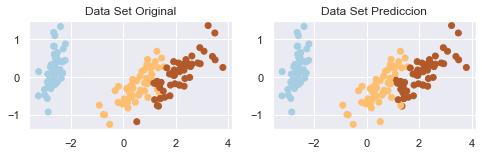

In [327]:
fig,ax = plt.subplots(1,2,figsize=(8,2))
ax[0].scatter(X_2D[:,0], X_2D[:,1], c=y, cmap=plt.cm.Paired)
ax[0].set_title('Data Set Original')
ax[1].scatter(X_2D[:,0], X_2D[:,1], c=y_pred, cmap=plt.cm.Paired)
ax[1].set_title('Data Set Prediccion')
plt.show()

In [332]:
from sklearn.model_selection import train_test_split

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [336]:
X_train[0:5], X_test[0:5], y_train[0:5], y_test[0:5]

(array([[5.2, 3.4, 1.4, 0.2],
        [5.7, 2.9, 4.2, 1.3],
        [5.5, 2.6, 4.4, 1.2],
        [6.7, 3. , 5.2, 2.3],
        [6.9, 3.1, 5.4, 2.1]]),
 array([[5.7, 2.5, 5. , 2. ],
        [6.7, 2.5, 5.8, 1.8],
        [6.4, 3.1, 5.5, 1.8],
        [5.4, 3.7, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0., 1., 1., 2., 2.]),
 array([2., 2., 2., 0., 0.]))

In [337]:
X_train.shape, X_test.shape

((112, 4), (38, 4))

In [338]:
iris_knn = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
y_pred = iris_knn.predict(X_test)
y_train_pred = iris_knn.predict(X_train)

In [342]:
# n_neighbors=5, Training cross-validation score
iris_knn.score(X_train,y_train)

0.9553571428571429

In [346]:
# n_neighbors=5 Test cross-validation score
iris_knn.score(X_test,y_test)


1.0

In [349]:
#DataFrame diabetes original sin normalizar
aData = df_aux

In [356]:
aData.head()

,Partos,Glucosa,Presion,Piel,Insulina,IMC,Pedi,Edad,Clase
0,6,148.0,72.0,35.0,125.0,33.6,0.63,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.35,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.67,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.17,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.29,33,1


In [351]:
X = df_aux.values[:,:-1] # Separamos los descriptores

In [352]:
y = df_aux.values[:,8] # Separamos las Clases

In [359]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [355]:
y[0::10] # mostramos solo las 10 primeras clases...

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0.])

In [360]:
X_train, X_test, y_train, y_test = train_test_split(X,y) 

In [361]:
X_train.shape, X_test.shape

((576, 8), (192, 8))

In [362]:
diabetes_knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = diabetes_knn.predict(X_test)
y_train_pred = diabetes_knn.predict(X_train)

In [365]:
y_pred

array([0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0.])

In [366]:
diabetes_knn.score(X_train, y_train)

0.8385416666666666

In [367]:
diabetes_knn.score(X_test, y_test)

0.7291666666666666

In [370]:
print(metrics.classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))

              precision    recall  f1-score   support

 No Diabetes       0.78      0.81      0.79       123
    Diabetes       0.63      0.58      0.61        69

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.72      0.73      0.73       192



In [374]:
X_train, X_test, y_train, y_test = train_test_split(X,y) 

In [375]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)

In [378]:
x_pred = kmeans.predict(X_test)
#y_pred = kmeans.predict(X_test)

In [379]:
x_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [380]:
print(metrics.classification_report(x_pred, y_pred, target_names=['No Diabetes', 'Diabetes']))


              precision    recall  f1-score   support

 No Diabetes       0.95      0.67      0.78       182
    Diabetes       0.05      0.30      0.08        10

    accuracy                           0.65       192
   macro avg       0.50      0.49      0.43       192
weighted avg       0.90      0.65      0.75       192



In [381]:
from sklearn.linear_model import LinearRegression


In [397]:
model = LinearRegression()
model.fit(X_train,y_train) 

LinearRegression()

In [403]:
prediccion = model.predict(X_test)

In [399]:
prediccion[0:5] # los 5 primeros...

array([0.86988647, 0.2725784 , 0.35930825, 0.62239398, 0.34165801])

In [386]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [407]:
# Calculo de estadisticos
print(mse(y_test,prediccion)) # Error Medio Cuadratico
r2_score(y_test,prediccion)   # R2 score

0.1348961071320479


0.40201898829776184